# Analiza podatkov

Avtorica: Sara Polajnar

Vsi podatki, uporabljeni v nalogi so bili vzeti iz [spletne strani](https://worldathletics.org/records/toplists/sprints/60-metres/all/women/senior/2024?regionType=world&timing=electronic&windReading=regular&page=1&bestResultsOnly=true&maxResultsByCountry=all&eventId=10229684&ageCategory=senior) dne 10.10.2024.

Naložimo potrebne podatke in knjižnice.

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

tabela_podatkov = pd.read_csv('pridobivanje_podatkov/podatki.csv')

## Vsi podatki
Za začetek si poglejmo vse zajete podatke:

In [46]:
tabela_podatkov

,uvrstitev,rezultat [s],ime tekmovalke,datum rojstva,država,pozicija,datum dogodka,skupne točke,kontinent
0,1,6.98,Julien ALFRED,10 JUN 2001,LCA,1,02 MAR 2024,1227,Severna in Srednja Amerika
1,1,6.98,Ewa SWOBODA,26 JUL 1997,POL,1sf1,02 MAR 2024,1227,Evropa
2,3,7.02,Zaynab DOSSO,12 SEP 1999,ITA,2,06 FEB 2024,1213,Evropa
3,3,7.02,Aleia HOBBS,24 FEB 1996,USA,1,17 FEB 2024,1213,Severna in Srednja Amerika
4,5,7.03,Shashalee FORBES,10 MAY 1996,JAM,1f2,27 JAN 2024,1209,Severna in Srednja Amerika
...,...,...,...,...,...,...,...,...,...
9188,9059,8.30,Mimi ZAJEC,2012,SLO,3,11 MAY 2024,816,Evropa
9189,9059,8.30,Thea MOODY,2010,CZE,3h1,01 JUN 2024,809,Evropa
9190,9059,8.30,Simona LELOVSKÁ,2007,SVK,5f1,09 JUN 2024,809,Evropa
9191,9059,8.30,Ema VORÁČKOVÁ,2008,CZE,4f2,10 AUG 2024,809,Evropa


## Kateri rezultat je doseglo največ tekmovalk?

In [82]:
def st_tekmovalk_na_rezultat(tabela):
    tabela['rezultat [s]'] = tabela['rezultat [s]'].astype(float)
    pogostost_rezultatov = tabela['rezultat [s]'].value_counts()

    return pogostost_rezultatov

najnizji_rezultat = tabela_podatkov['rezultat [s]'].min()
najvisji_rezultat = tabela_podatkov['rezultat [s]'].max() 

print(st_tekmovalk_na_rezultat(tabela_podatkov).head(5))
print(f'Najboljši rezultat: {najnizji_rezultat}')
print(f'Najslabši rezultat: {najvisji_rezultat}')


rezultat [s]
8.18    175
8.20    175
8.25    159
8.26    157
8.09    155
Name: count, dtype: int64
Najboljši rezultat: 6.98
Najslabši rezultat: 8.3


Vidimo, da je največ tekmovalk doseglo rezultat 8.18 in 8.20, kar se opazno razlikuje od najboljšega, ki znaša 6.98.

Vsi rezultati razporejeni glede na to, koliko tekmovalk jih je doseglo: 

Text(0, 0.5, 'Število tekmovalk')

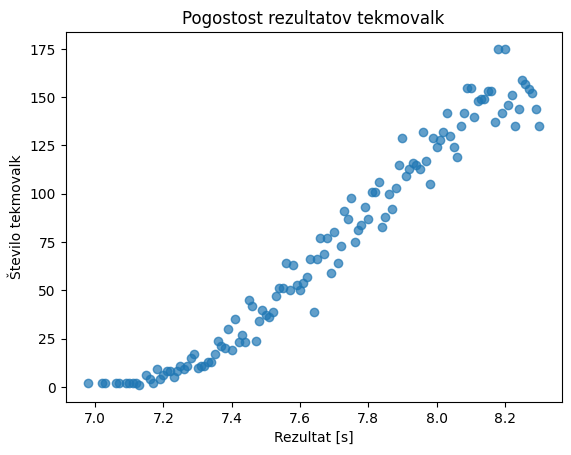

In [89]:
rezultati = st_tekmovalk_na_rezultat(tabela_podatkov)

plt.scatter(rezultati.index, rezultati.values, alpha=0.7)
plt.title('Pogostost rezultatov tekmovalk')  
plt.xlabel('Rezultat [s]')  
plt.ylabel('Število tekmovalk')


## Katere države zasegajo najboljše rezultate?

Text(0, 0.5, 'Povprečni rezultat [s]')

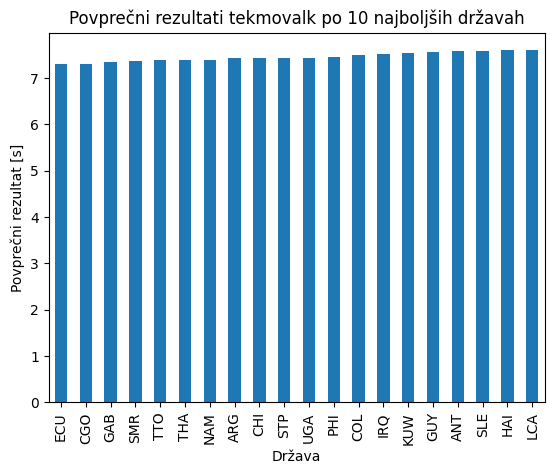

In [95]:
rezultat_za_drzavo = tabela_podatkov.groupby('država')['rezultat [s]'].mean()
najboljsih_deset = rezultat_za_drzavo.nsmallest(20)

najboljsih_deset.plot.bar()
plt.title('Povprečni rezultati tekmovalk po 10 najboljših državah')
plt.xlabel('Država')
plt.ylabel('Povprečni rezultat [s]')

## Iz katerega kontinenta prihajajo najboljše tekmovalke?